## IMPORTING LIBRARIES

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import json
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## READING CSV FILES AND CREATING ARRAY

In [3]:
df=pd.read_csv("training_backup.csv")
df_new=pd.read_csv("testing_backup.csv")

In [4]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [5]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

## REMOVING STOP-WORDS AND LEMMATIZING

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df.tail()

,lyrics,mood
1477,"[yeah-yeah, yeah-yeah, yeah-yeah, yeah-yeah, y...",1
1478,"[rip, them, down, hold, me, up, tell, them, th...",3
1479,"[it, 's, way, too, late, to, think, of, someon...",4
1480,"[got, no, place, to, go, but, there, 's, a, gi...",2
1481,"[every, light, in, the, night, flicker, in, an...",1


In [8]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

## CREATING TRAINING X, Y  SETS

In [9]:
train_x = df['text_final']
valid_x = df_new['text_final'][:233]
train_y = df['mood']
valid_y = df_new['mood'][:233]

## LABEL ENCODING

In [10]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [11]:
all_texts = []
for items in train_x:
    all_texts.append(items) 
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['god', 'need', 'friend', 'god', 'come', 'end', 'god', 'lose', 'mind', 'god', 'find', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'love', 'felt', 'like', 'hate', 'hate', 'felt', 'like', 'love', 'say', 'fear', 'say', 'scar', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'ca', 'take', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'tell', 'believe', 'tell', 'believe', 'lady', 'gentleman', 'may', 'attention', 'ready', 'joke', 'ready', 'great', 'deception', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe']


In [12]:
#importing more libraries (Here we go again xD)
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

## COUNT VECTORIZER

In [13]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

## PORTER STEMMER

In [15]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()
def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )

## VECTORISING USING TF-IDF

In [16]:
#tfidf_vect = TfidfVectorizer(analyzer='word',max_features=7000)
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

## FUNCTION FOR TRAINING THE MODEL

In [17]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

## NAIVE BAYES CLASSIFIER (uncomment and check out what accuracy you get😉)

In [18]:
# from sklearn import naive_bayes
# from sklearn.model_selection import train_test_split
# accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), train_x, train_y, valid_x)
# print ("NB, Count Vectors: ", accuracy_count_nb)

# accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
# print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)

# accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
# print ("NB, N-Gram Vectors: ", accuracy_ngram_nb)

## RANDOM FOREST CLASSIFIER { using n_estimators (user input for number of trees) }

In [19]:
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.630901287553648
RF, WordLevel TF-IDF Vectors:  0.648068669527897
RF, N-Gram Vectors:  0.5965665236051502


## LOGISTIC REGRESSION (uncomment and check it out too)

In [20]:
# accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
# print ("LR, Count Vectors: ", accuracy_count_lc)

# accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
# print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

# accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
# print ("LR, N-Gram Vectors: ", accuracy_ngram_lc)

## XG-Boost CLASSIFIER (yea ik..... Go ahead and uncomment it😌)

In [21]:
# accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
# print ("Xgb, Count Vectors: ", accuracy_count_bo)

# accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
# print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

# accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
# print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

## LinearSVC MODEL (Last uncomment I promise..... or is it🤔?)

In [22]:
# from sklearn.svm import LinearSVC
# accuracy_count_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_count, train_y, xvalid_count)
# print ("SVM, Count Vectors: ", accuracy_count_svm)

# accuracy_word_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf, train_y, xvalid_tfidf)
# print ("SVM, WordLevel TF-IDF: ", accuracy_word_svm)

# accuracy_ngram_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
# print ("SVM, Ngram Vectors: ", accuracy_ngram_svm)

## RANDOM FOREST USING ENSEMBLE (determination of number of trees is automatic)

In [23]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

RF, Count Vectors:  0.6266094420600858
RF, WordLevel TF-IDF:  0.6351931330472103
RF, Ngram Vectors:  0.6008583690987125


In [24]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

RF, Count Vectors:  0.6437768240343348
RF, WordLevel TF-IDF:  0.6437768240343348
RF, Ngram Vectors:  0.6266094420600858


## LET'S START SOME GRAPHING NOW!!

In [25]:
import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))
    print(metrics.classification_report(y, clf.predict(X)))
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm, 
            cbar=False,
            annot=True, 
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','relaxed'],
            xticklabels=['happy','sad','angry','relaxed'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    #plt.savefig("rf_tfidf.jpg")
    plt.show()

## GRAPHING FOR RANDOM FOREST USING TF-IDF

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        97
           1       0.51      0.85      0.64        68
           2       1.00      0.33      0.50        12
           3       0.68      0.41      0.51        56

    accuracy                           0.64       233
   macro avg       0.74      0.56      0.59       233
weighted avg       0.69      0.64      0.63       233



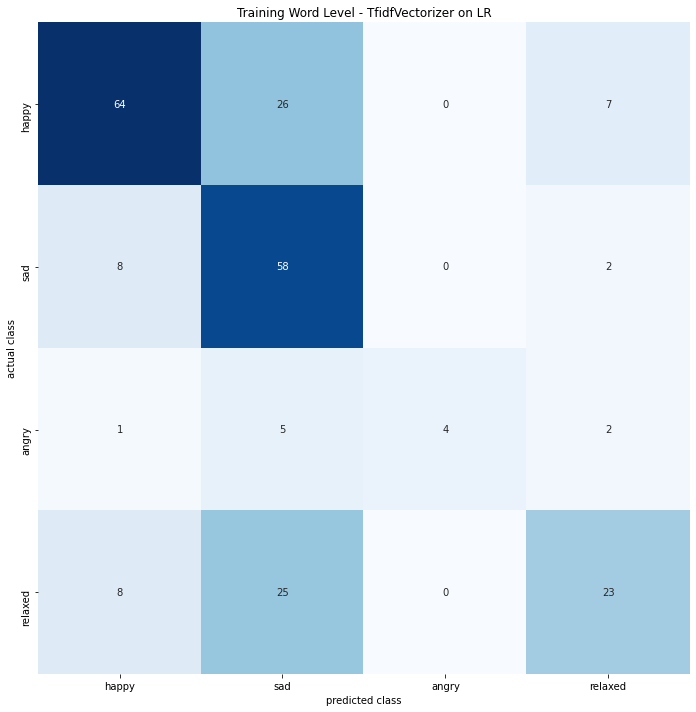

In [26]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on LR')

## GRAPHING FOR LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.78      0.66      0.72        97
           1       0.58      0.66      0.62        68
           2       0.44      0.33      0.38        12
           3       0.54      0.62      0.58        56

    accuracy                           0.64       233
   macro avg       0.59      0.57      0.57       233
weighted avg       0.65      0.64      0.64       233



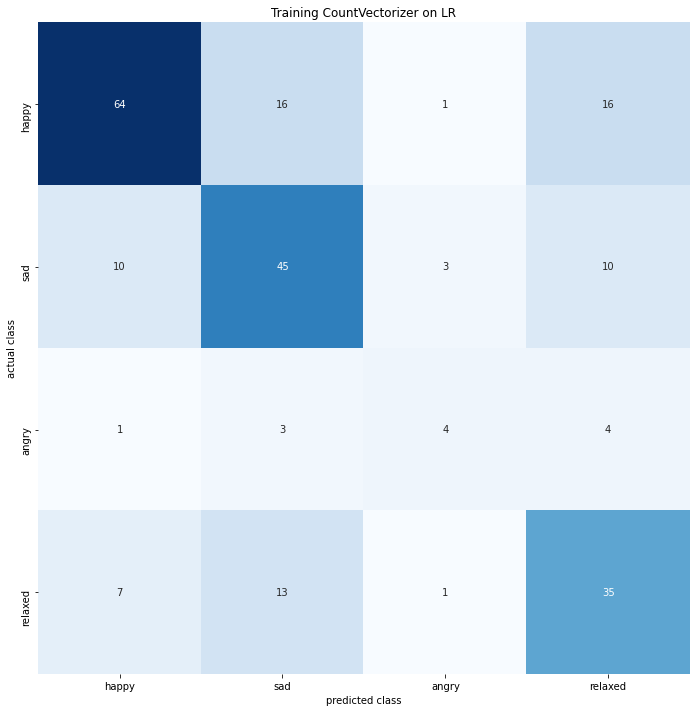

In [27]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=linear_model.LogisticRegression()
claf.fit(xtrain_count,train_y)
plot_cm(xvalid_count, valid_y, claf, 'Training CountVectorizer on LR')

## GRAPHING FOR RANDOM FOREST USING TF-IDF AND N-GRAM (together)

              precision    recall  f1-score   support

           0       0.86      0.53      0.65        97
           1       0.52      0.81      0.64        68
           2       0.80      0.33      0.47        12
           3       0.53      0.61      0.57        56

    accuracy                           0.62       233
   macro avg       0.68      0.57      0.58       233
weighted avg       0.68      0.62      0.62       233



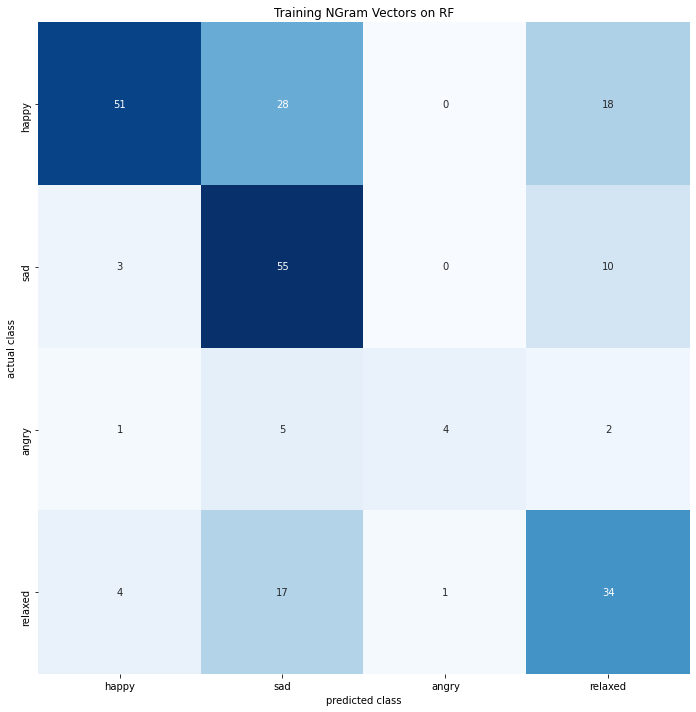

In [28]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()
claf.fit(xtrain_tfidf_ngram,train_y)
plot_cm(xvalid_tfidf_ngram, valid_y, claf, 'Training NGram Vectors on RF')

## GRAPHING FOR LinearSVC USING TF-IDF

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        97
           1       0.64      0.69      0.67        68
           2       0.80      0.33      0.47        12
           3       0.51      0.61      0.55        56

    accuracy                           0.65       233
   macro avg       0.68      0.58      0.60       233
weighted avg       0.67      0.65      0.65       233



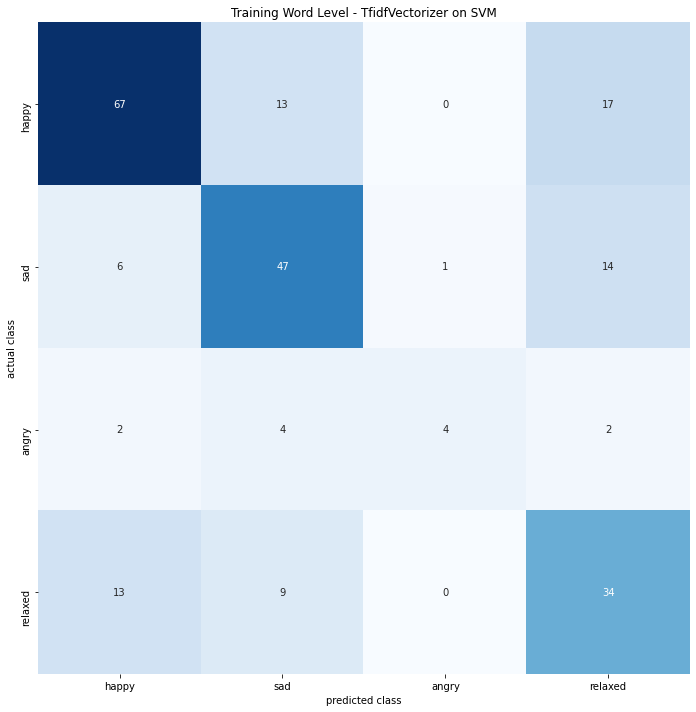

In [29]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=svm.LinearSVC(multi_class="ovr")
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on SVM')

## FUNCTION FOR PREDICTING THE RESULT

In [30]:
def pred(lyrics):
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    print("Tag: ",end='')
    if y==0:
        print("Happy")
    elif(y==1):
        print("Sad")
    elif(y==2):
        print("Angry")
    elif(y==3):
        print("Relaxed")

## THE COMMENTED PART IS SONG, STITCHES- by Shawn Mendez
## THE UNCOMMENTED ONE IS, STAN- by EMINEM

In [31]:
# STITCHES
# lyrics = "I thought that I've been hurt before But no one's ever left me quite this sore Your words cut deeper than a knife\
# Now I need someone to breathe me back to life\
# Got a feeling that I'm going under\
# But I know that I'll make it out alive\
# If I quit calling you my lover\
# Move on\
# You watch me bleed until I can't breathe\
# I'm shaking, falling onto my knees\
# And now that I'm without your kisses\
# I'll be needing stitches\
# Tripping over myself\
# Aching, begging you to come help\
# And now that I'm without your kisses\
# I'll be needing stitches\
# "
lyrics = "I am angry. My blood is boiling. I have to get revenge Nowhere is that more disgraceful proof that my soul is broken. I am dead because"

In [32]:
pred(lyrics)

Tag: Angry


## SAVING THE MODEL

In [33]:
import joblib
joblib.dump(claf, "MoodRecog.joblib")

['MoodRecog.joblib']

## LOADING THE MODEL

In [34]:
import joblib
loaded_rf = joblib.load("MoodRecog.joblib")